In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from pandas.plotting.scatter_matrix import scatter_matrix
from pandas.plotting import scatter_matrix
%matplotlib inline 


#### Let's see the first row to have overview of columns in the dataset and their values for the first row

In [39]:
recent_grads=pd.read_csv(r'file path\recent_grads.csv')
recent_grads.iloc[0]


Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [40]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


#### Let's check if there is missing values in one or more columns.

In [41]:
recent_grads.info()
#Some rows of empty values and we can just drop the row if it doesn't affect the analysis.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

In [42]:
recent_grads.shape


(173, 21)

In [43]:
recent_grads=recent_grads.dropna()
recent_grads.shape
#droped columns with missing value

(172, 21)

#### Scatter plot of numeric columns gives as relation between columns

(0, 500)

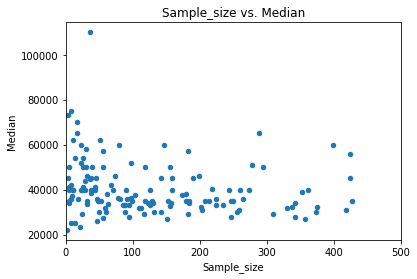

In [44]:
axsm=recent_grads.plot(x='Sample_size', y='Median', kind='scatter')
axsm.set_title('Sample_size vs. Median')
axsm.set_xlim(0,500)

(0, 0.3)

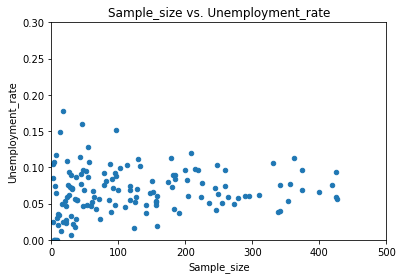

In [45]:
axsu=recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')
axsu.set_title('Sample_size vs. Unemployment_rate')
axsu.set_xlim(0,500)
axsu.set_ylim(0,0.3)



(0, 114400.01131197007)

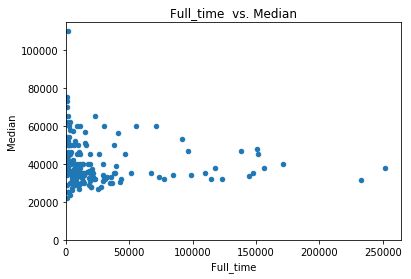

In [46]:
axfm=recent_grads.plot(x='Full_time', y='Median', kind='scatter')
axfm.set_title('Full_time  vs. Median')
axfm.set_xlim(0,)
axfm.set_ylim(0,)


(0, 0.19739969743484989)

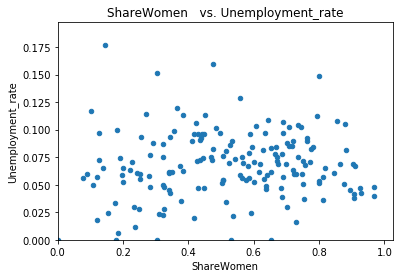

In [47]:
axsu=recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')
axsu.set_title('ShareWomen   vs. Unemployment_rate')
axsu.set_xlim(0,)
axsu.set_ylim(0,)

(0, 114400.01131197007)

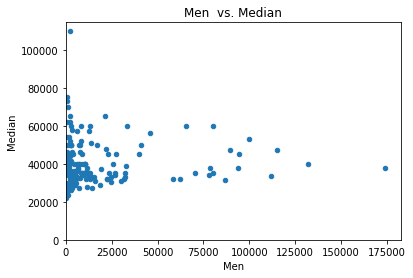

In [48]:
axmm=recent_grads.plot(x='Men', y='Median', kind='scatter')
axmm.set_title('Men  vs. Median')
axmm.set_xlim(0,)
axmm.set_ylim(0,)

(0, 114400.01131197007)

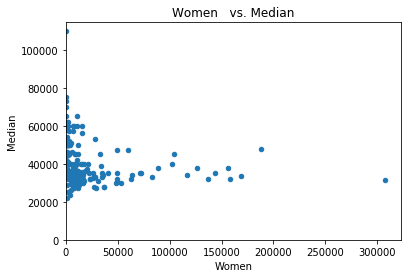

In [49]:
axwm=recent_grads.plot(x='Women', y='Median', kind='scatter')
axwm.set_title('Women   vs. Median')
axwm.set_xlim(0,)
axwm.set_ylim(0,)

#### Similarly, histogram plot gives us most commen range/s

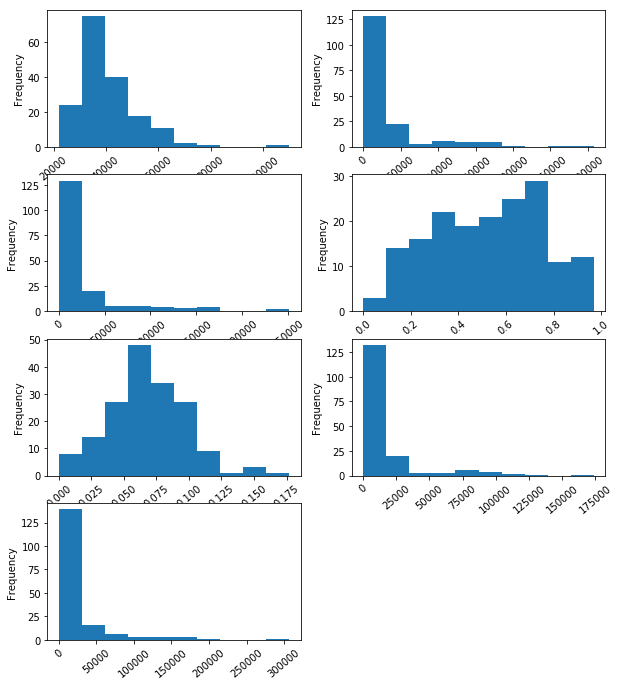

In [50]:
cols=['Sample_size',
'Median',
'Employed',
'Full_time',
'ShareWomen',
'Unemployment_rate'
,'Men',
'Women']
fig=plt.figure(figsize=(10,10))
fig.subplots_adjust(top=1  )
for i in range(1,8):
    ax=fig.add_subplot(4,2,i)
    ax=recent_grads[cols[i]].plot(kind='hist',rot=40)
    
    
    

#### Pandas scatter matrix plot to get pairwise scatter plots in a single page. The daigonal is could be left empty as it's plot of variable against itself. 

Text(0.5,0.98,'scatter-matrix')

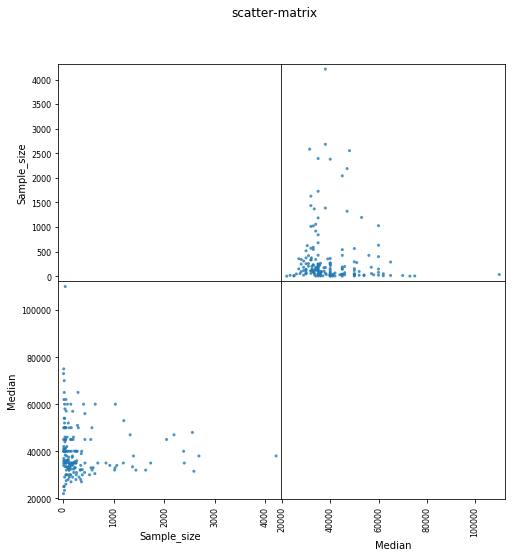

In [73]:
scatter_matrix(recent_grads[['Sample_size','Median']],figsize=(8,8), alpha=0.8,diagonal=None)
plt.suptitle('scatter-matrix')

#### We can also plot in the diagonal columns, for example in this case kde(kernel density estimation) gives as probably density.Much better than leaving it empty.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000176E82128D0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000176F200F240>]], dtype=object)

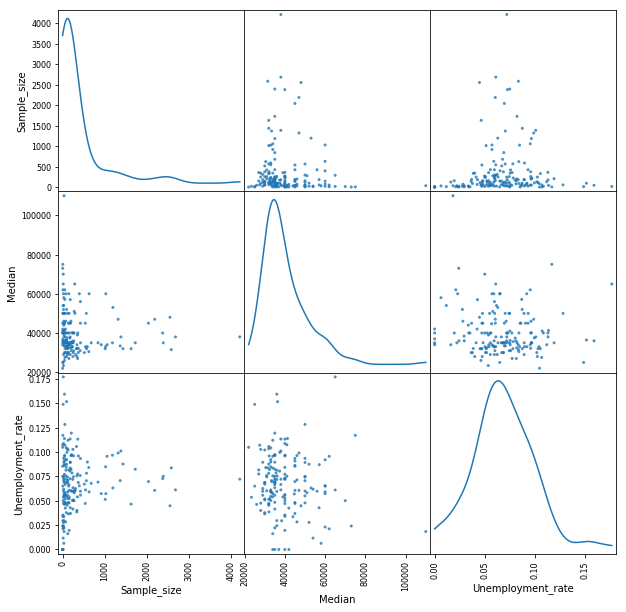

In [72]:
scatter_matrix(recent_grads[['Sample_size','Median','Unemployment_rate']],figsize=(10,10),alpha=0.8,diagonal='kde')

In [18]:
recent_grads['P25th'][0:5].sort_values()
#recent_grads['P75th'][0:5]

3    43000
2    50000
4    50000
1    55000
0    95000
Name: P25th, dtype: int64

#### Let us visualize sharewomen in highest and lowest paying majors respectively. Make your own conclusion :)

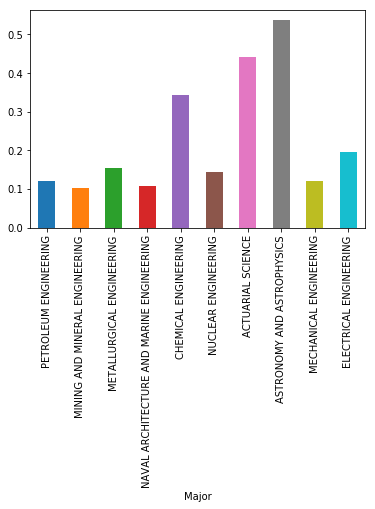

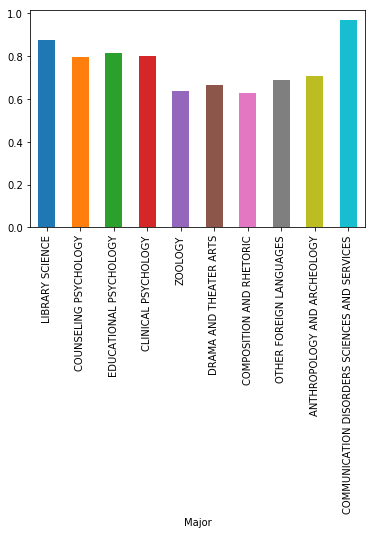

In [62]:
highest_paying_majors = recent_grads.nlargest(10, 'Median')
lowest_paying_majors = recent_grads.nsmallest(10, 'Median')
highest_paying_majors[:10].plot.bar(x='Major', y='ShareWomen', legend=False)
lowest_paying_majors[:10].plot.bar(x='Major', y='ShareWomen', legend=False)

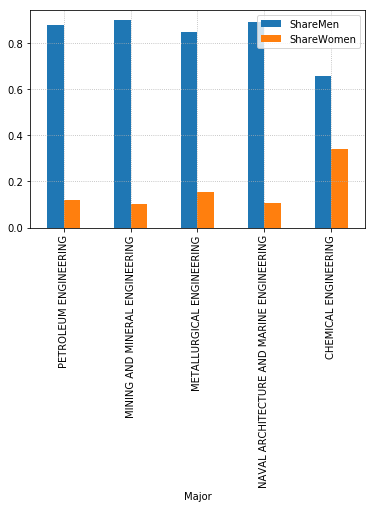

In [68]:
# Pandas generated grouped bar plot
highest_paying_majors = recent_grads.nlargest(5, 'Median')
highest_paying_majors["ShareMen"] = recent_grads["Men"] / highest_paying_majors["Total"]
highest_paying_majors.set_index("Major", inplace=True)
highest_paying_majors[["ShareMen", "ShareWomen"]].plot(kind="bar")
plt.legend( ["ShareMen", "ShareWomen"],loc='best')
plt.grid(linestyle='dotted')